In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_data.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df.shape

(5681, 11)

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

in that model the outlate size are vary high number for the nan values so we drop this column and also we drop the item weight column

In [7]:
df=df.drop('Item_Weight', axis=1)

In [8]:
df=df.drop('Outlet_Size', axis=1)

In [9]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Tier 1,Supermarket Type1
1,FDW14,reg,0.038428,Dairy,87.3198,OUT017,2007,Tier 2,Supermarket Type1
2,NCN55,Low Fat,0.099575,Others,241.7538,OUT010,1998,Tier 3,Grocery Store
3,FDQ58,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Tier 2,Supermarket Type1
4,FDY38,Regular,0.118599,Dairy,234.2300,OUT027,1985,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Tier 1,Supermarket Type1
5677,FDD47,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Tier 3,Supermarket Type2
5678,NCO17,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Tier 2,Supermarket Type1
5679,FDJ26,Regular,0.000000,Canned,214.6218,OUT017,2007,Tier 2,Supermarket Type1


In [10]:
df['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [11]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [12]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [13]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [14]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

in above information we see that there are some columns are in the object types but they are important for the dataset so we change that object type to the float or int type

In [15]:
from sklearn.preprocessing import LabelEncoder 

In [16]:
le=LabelEncoder()

In [17]:
for i in df:
    le=LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [18]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,1,66,13,1460,9,4,0,1
1,1067,4,1714,4,965,2,7,1,1
2,1406,1,4042,11,4076,0,3,2,0
3,809,1,388,13,2522,2,7,1,1
4,1184,2,4423,4,3972,5,0,2,3
...,...,...,...,...,...,...,...,...,...
5676,231,2,290,13,2164,8,2,0,1
5677,306,2,4815,15,2833,3,8,2,2
5678,1412,1,3256,8,1752,7,5,1,1
5679,517,2,0,3,3691,2,7,1,1


we encoding the all the values in the dataset so we furter see the there data visualization methodes. 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            5681 non-null   int32
 1   Item_Fat_Content           5681 non-null   int32
 2   Item_Visibility            5681 non-null   int64
 3   Item_Type                  5681 non-null   int32
 4   Item_MRP                   5681 non-null   int64
 5   Outlet_Identifier          5681 non-null   int32
 6   Outlet_Establishment_Year  5681 non-null   int64
 7   Outlet_Location_Type       5681 non-null   int32
 8   Outlet_Type                5681 non-null   int32
dtypes: int32(6), int64(3)
memory usage: 266.4 KB


we see that there all values are in int format.

In [20]:
df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

EDA process

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Fat_Content'>

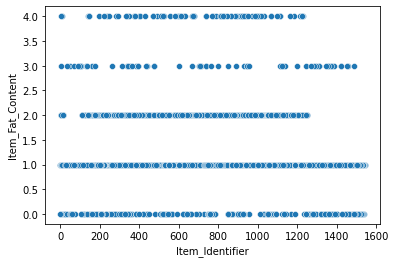

In [21]:
sns.scatterplot(x='Item_Identifier', y='Item_Fat_Content', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Visibility'>

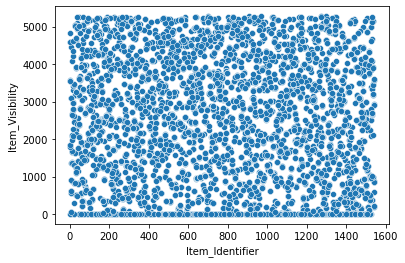

In [22]:
sns.scatterplot(x='Item_Identifier', y='Item_Visibility', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Type'>

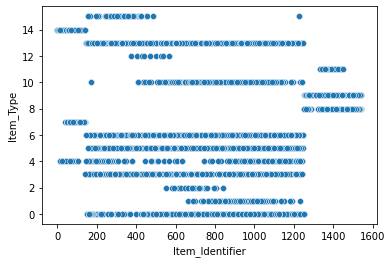

In [23]:
sns.scatterplot(x='Item_Identifier', y='Item_Type', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_MRP'>

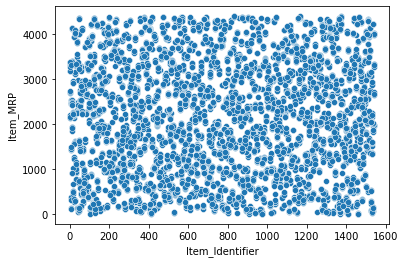

In [24]:
sns.scatterplot(x='Item_Identifier', y='Item_MRP', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Outlet_Identifier'>

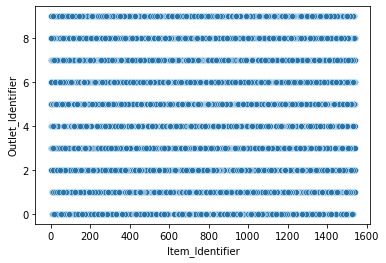

In [25]:
sns.scatterplot(x='Item_Identifier', y='Outlet_Identifier', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Outlet_Establishment_Year'>

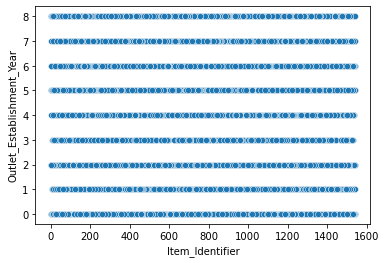

In [26]:
sns.scatterplot(x='Item_Identifier', y='Outlet_Establishment_Year', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Outlet_Location_Type'>

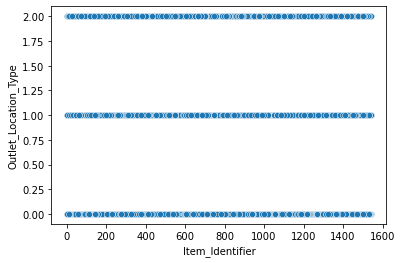

In [27]:
sns.scatterplot(x='Item_Identifier', y='Outlet_Location_Type', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Outlet_Type'>

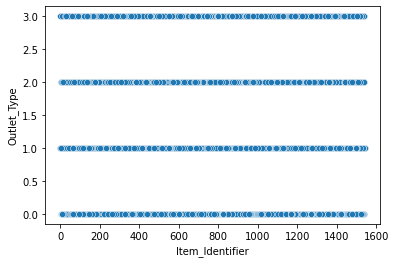

In [28]:
sns.scatterplot(x='Item_Identifier', y='Outlet_Type', data=df)

in this one columns we see all others columns and see that the realation is not find so we get the pairplot

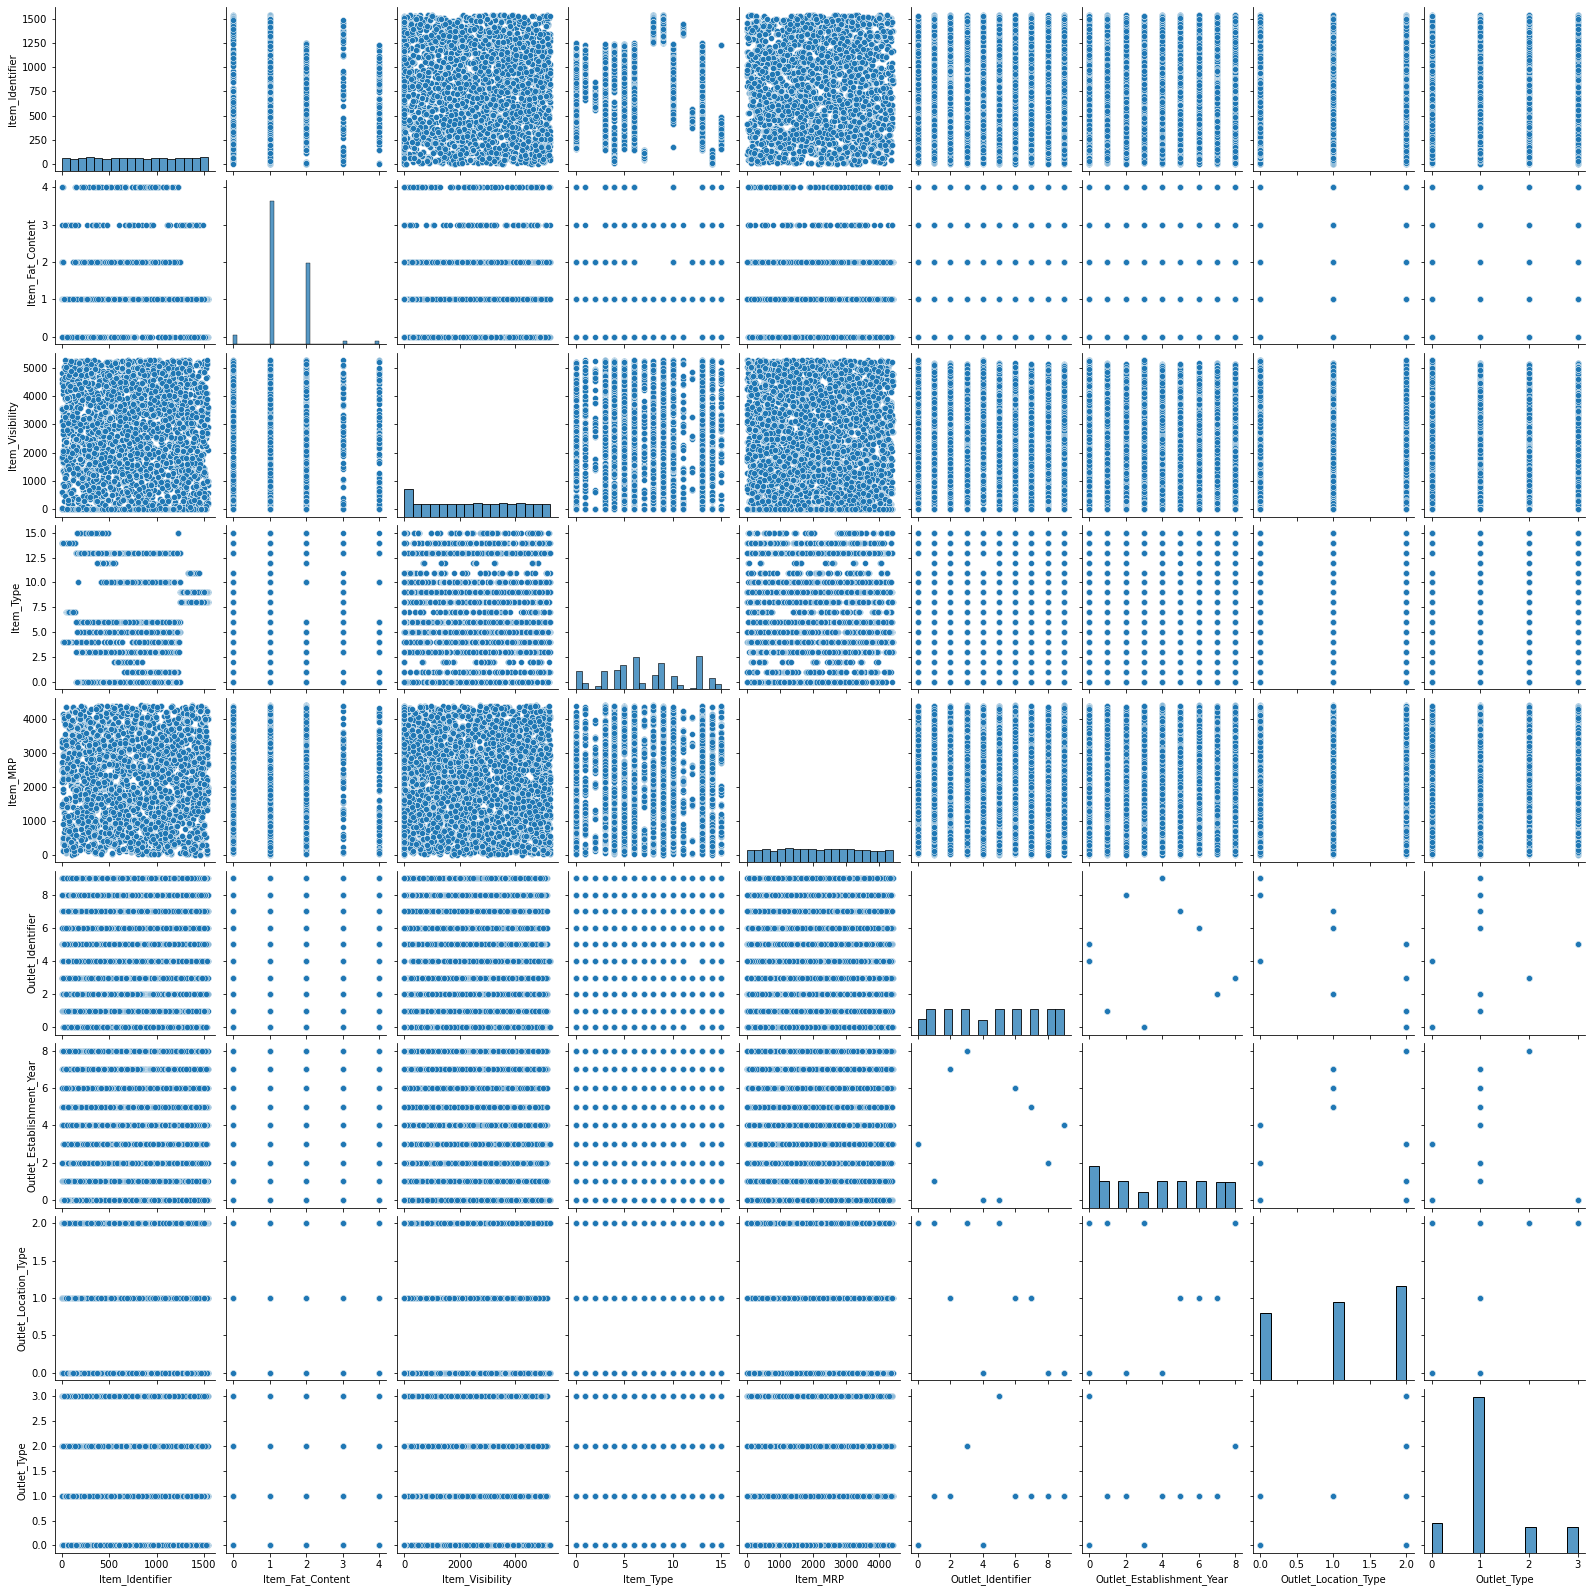

In [29]:
sns.pairplot(df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Outlet_Type'>

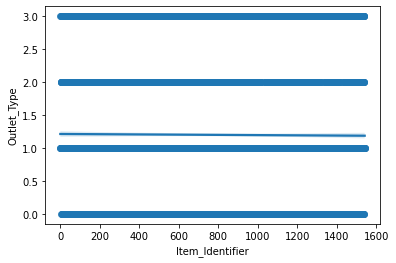

In [30]:
sns.regplot(x='Item_Identifier', y='Outlet_Type', data=df)

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Type'>

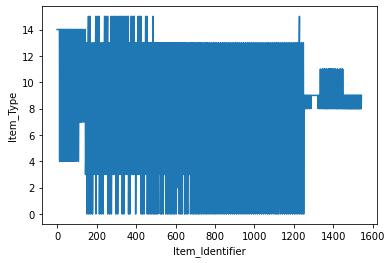

In [32]:
sns.lineplot(x='Item_Identifier', y='Item_Type', data=df)

In [33]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,1,66,13,1460,9,4,0,1
1,1067,4,1714,4,965,2,7,1,1
2,1406,1,4042,11,4076,0,3,2,0
3,809,1,388,13,2522,2,7,1,1
4,1184,2,4423,4,3972,5,0,2,3


In [36]:
df.describe()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000
mean,773.386376,1.368773,2481.179370,7.233410,2183.482485,4.722760,3.78965,1.112832,1.201373
std,445.525926,0.641085,1606.483828,4.219057,1247.683262,2.837201,2.73036,0.812824,0.796740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,382.000000,1.000000,1063.000000,4.000000,1127.000000,2.000000,1.00000,0.000000,1.000000
50%,771.000000,1.000000,2477.000000,6.000000,2168.000000,5.000000,4.00000,1.000000,1.000000
75%,1160.000000,2.000000,3876.000000,10.000000,3239.000000,7.000000,6.00000,2.000000,1.000000
max,1542.000000,4.000000,5276.000000,15.000000,4401.000000,9.000000,8.00000,2.000000,3.000000


<AxesSubplot:>

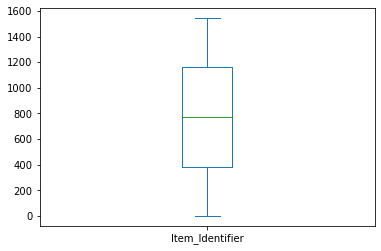

In [41]:
df['Item_Identifier'].plot.box()

<AxesSubplot:>

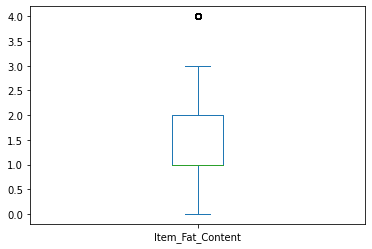

In [42]:
df['Item_Fat_Content'].plot.box()

only few oultliers are present in that columns.

<AxesSubplot:>

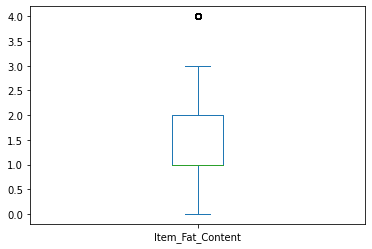

In [43]:
df['Item_Fat_Content'].plot.box()

only few oultliers are present in that columns.

<AxesSubplot:>

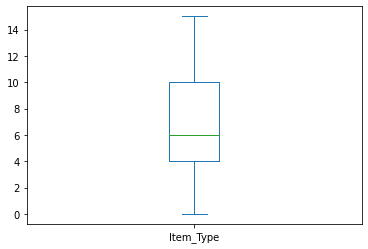

In [44]:
df['Item_Type'].plot.box()

<AxesSubplot:>

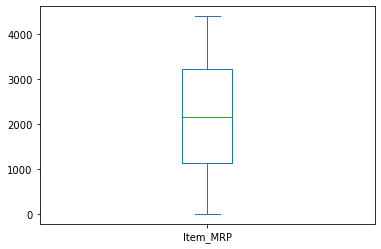

In [45]:
df['Item_MRP'].plot.box()

<AxesSubplot:>

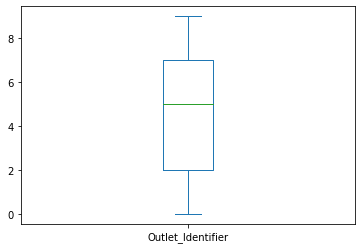

In [46]:
df['Outlet_Identifier'].plot.box()

<AxesSubplot:>

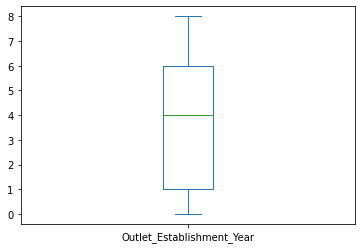

In [47]:
df['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

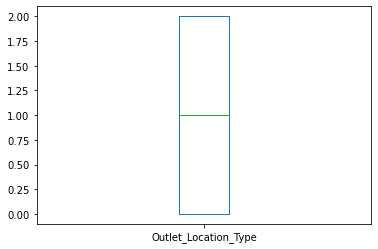

In [48]:
df['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

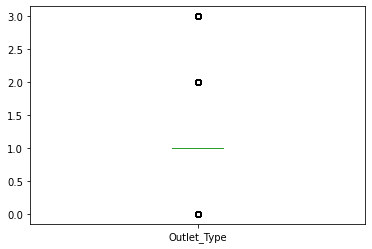

In [49]:
df['Outlet_Type'].plot.box()

only 3 points are in that column so we not get the outliers

# checking the correlation

In [52]:
ss=df.corr()
ss

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,-0.093344,-0.068666,-0.003236,0.009524,0.010162,0.013450,-0.011657,-0.009553
Item_Fat_Content,-0.093344,1.000000,0.030774,-0.128945,-0.014932,-0.000792,-0.008782,-0.000130,0.000387
Item_Visibility,-0.068666,0.030774,1.000000,-0.047962,-0.006573,-0.084905,-0.077690,0.002916,-0.107382
Item_Type,-0.003236,-0.128945,-0.047962,1.000000,0.066380,0.000333,-0.001545,0.000584,0.006179
Item_MRP,0.009524,-0.014932,-0.006573,0.066380,1.000000,-0.006517,-0.005284,0.001288,0.002783
Outlet_Identifier,0.010162,-0.000792,-0.084905,0.000333,-0.006517,1.000000,-0.030916,-0.716113,0.099937
Outlet_Establishment_Year,0.013450,-0.008782,-0.077690,-0.001545,-0.005284,-0.030916,1.000000,0.041714,-0.040576
Outlet_Location_Type,-0.011657,-0.000130,0.002916,0.000584,0.001288,-0.716113,0.041714,1.000000,0.467299
Outlet_Type,-0.009553,0.000387,-0.107382,0.006179,0.002783,0.099937,-0.040576,0.467299,1.000000


In [70]:
df.corr()['Item_MRP']

Item_Identifier              0.009524
Item_Fat_Content            -0.014932
Item_Visibility             -0.006573
Item_Type                    0.066380
Item_MRP                     1.000000
Outlet_Identifier           -0.006517
Outlet_Establishment_Year   -0.005284
Outlet_Location_Type         0.001288
Outlet_Type                  0.002783
Name: Item_MRP, dtype: float64

<AxesSubplot:>

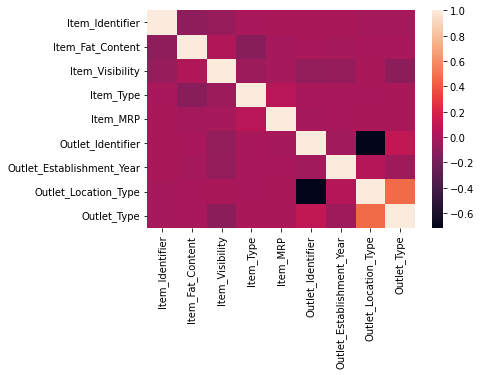

In [53]:
sns.heatmap(ss)

<AxesSubplot:>

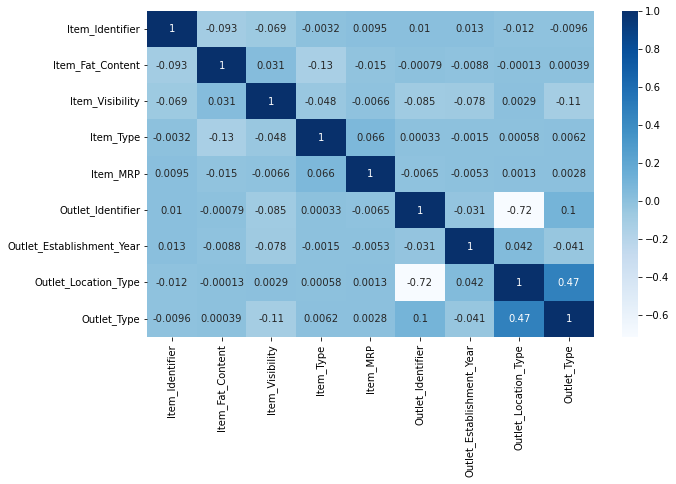

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(ss, cmap='Blues',annot=True)

in this relation we see that there are not very good correlation 

# checking the skewness 

In [56]:
df.skew()

Item_Identifier             -0.000020
Item_Fat_Content             0.999629
Item_Visibility              0.025333
Item_Type                    0.096486
Item_MRP                     0.019932
Outlet_Identifier           -0.060209
Outlet_Establishment_Year    0.034635
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

the skewness is very low in that dataset

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

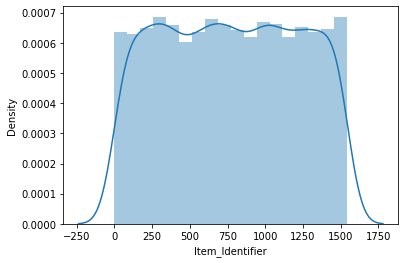

In [60]:
sns.distplot(df['Item_Identifier'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

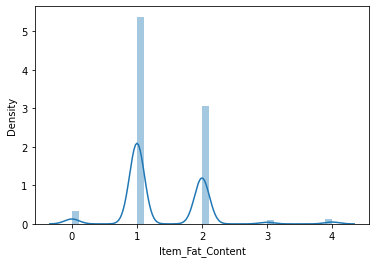

In [61]:
sns.distplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

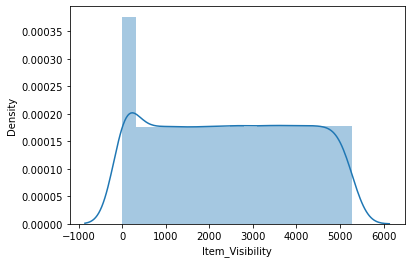

In [62]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

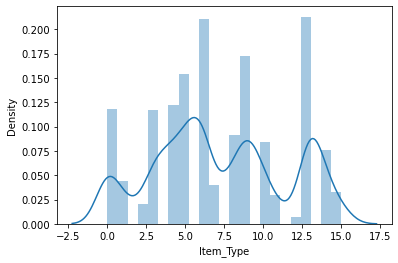

In [63]:
sns.distplot(df['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

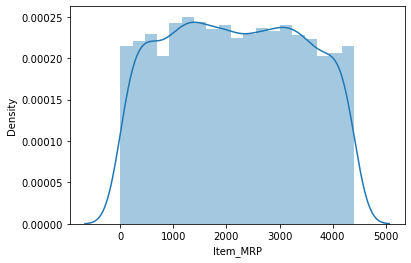

In [64]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

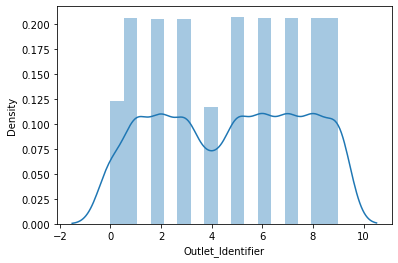

In [65]:
sns.distplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

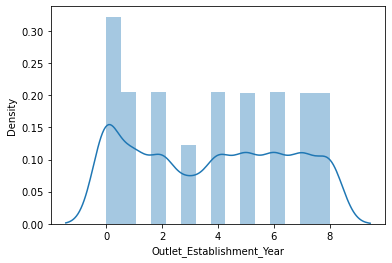

In [66]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

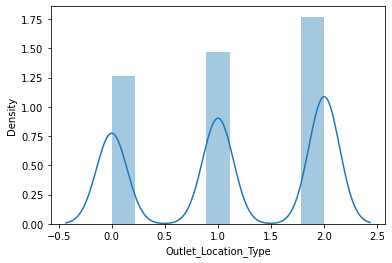

In [67]:
sns.distplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

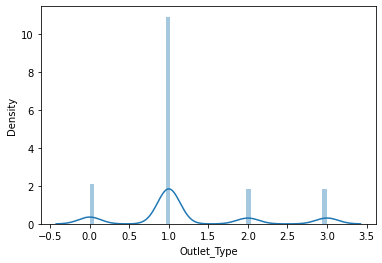

In [68]:
sns.distplot(df['Outlet_Type'])

skewness is not decresess

In [69]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,1103,1,66,13,1460,9,4,0,1
1,1067,4,1714,4,965,2,7,1,1
2,1406,1,4042,11,4076,0,3,2,0
3,809,1,388,13,2522,2,7,1,1
4,1184,2,4423,4,3972,5,0,2,3


In [91]:
x=df.drop('Item_MRP',axis=1)
y=df['Item_MRP']

removing outliers

In [92]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   1,  103,  242,  369,  499,  595,  739,  783,  797,  815,  985,
         996, 1025, 1037, 1105, 1143, 1256, 1284, 1314, 1321, 1422, 1437,
        1539, 1757, 1780, 1853, 1927, 2070, 2167, 2271, 2275, 2365, 2595,
        2798, 2866, 2915, 2926, 3039, 3077, 3097, 3357, 3362, 3461, 3565,
        3622, 3744, 3778, 3783, 3950, 4021, 4133, 4146, 4148, 4232, 4330,
        4334, 4340, 4352, 4478, 4542, 4616, 4692, 4726, 4845, 4870, 4921,
        4941, 4965, 4970, 5132, 5154, 5168, 5323, 5328, 5429, 5447, 5542,
        5671], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [93]:
df_new=df[(z<3).all(axis=1)]
print('old dataframe', df.shape)
print('new dataframe',df_new.shape)
print('total dropped rows', df.shape[0]-df_new.shape[0])

old dataframe (5681, 9)
new dataframe (5603, 9)
total dropped rows 78


percentage data loss

In [94]:
loss=(5681-5603)/5681*100
print(loss,'%')

1.3729977116704806 %


only 1.37 % data was loss that is mainor so we go to next process

In [95]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [96]:
# only for the selection the random value
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train , y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i}, the traing accuracy is- {r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is-{r2_score(y_test,pred_test)}")
    print('\n')

at random state 0, the traing accuracy is- 0.005354548344210341
at random state 0, the testing accuracy is-0.001174006496549751


at random state 1, the traing accuracy is- 0.005118867535309768
at random state 1, the testing accuracy is-0.00014079797261856708


at random state 2, the traing accuracy is- 0.005807537155611664
at random state 2, the testing accuracy is--0.0020647769764203794


at random state 3, the traing accuracy is- 0.0039250867864785155
at random state 3, the testing accuracy is-0.006578624409296685


at random state 4, the traing accuracy is- 0.005591751187778993
at random state 4, the testing accuracy is--0.0005231514009595983


at random state 5, the traing accuracy is- 0.004261131135193774
at random state 5, the testing accuracy is-0.005247850047616409


at random state 6, the traing accuracy is- 0.0041126632736229185
at random state 6, the testing accuracy is-0.005127513669694106


at random state 7, the traing accuracy is- 0.005521908065608483
at random state 7,

at random state 73, the testing accuracy is-0.00298327878859872


at random state 74, the traing accuracy is- 0.004085518294532409
at random state 74, the testing accuracy is-0.006046967638249634


at random state 75, the traing accuracy is- 0.004568039186607753
at random state 75, the testing accuracy is-0.004312135491993052


at random state 76, the traing accuracy is- 0.006106056865582632
at random state 76, the testing accuracy is--0.0030730456915846194


at random state 77, the traing accuracy is- 0.0067000756411979
at random state 77, the testing accuracy is--0.005023876367145519


at random state 78, the traing accuracy is- 0.006455876846180875
at random state 78, the testing accuracy is--0.003673963489966514


at random state 79, the traing accuracy is- 0.004816604281677517
at random state 79, the testing accuracy is-0.0027135826616027092


at random state 80, the traing accuracy is- 0.004874613772268166
at random state 80, the testing accuracy is-0.0010525733536895787


at ran